In [6]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams

In [3]:
temperatures = pd.read_csv('../data/Annual precipitation in inches entire great Lakes 19001986.csv')
df = temperatures.set_index('Time').sort_index()
df.index = df.index.to_series().apply(lambda x: x + 1899)
df

,x
Time,
1900,31.69
1901,29.77
1902,31.70
1903,33.06
1904,31.31
...,...
1982,34.39
1983,33.97
1984,32.15


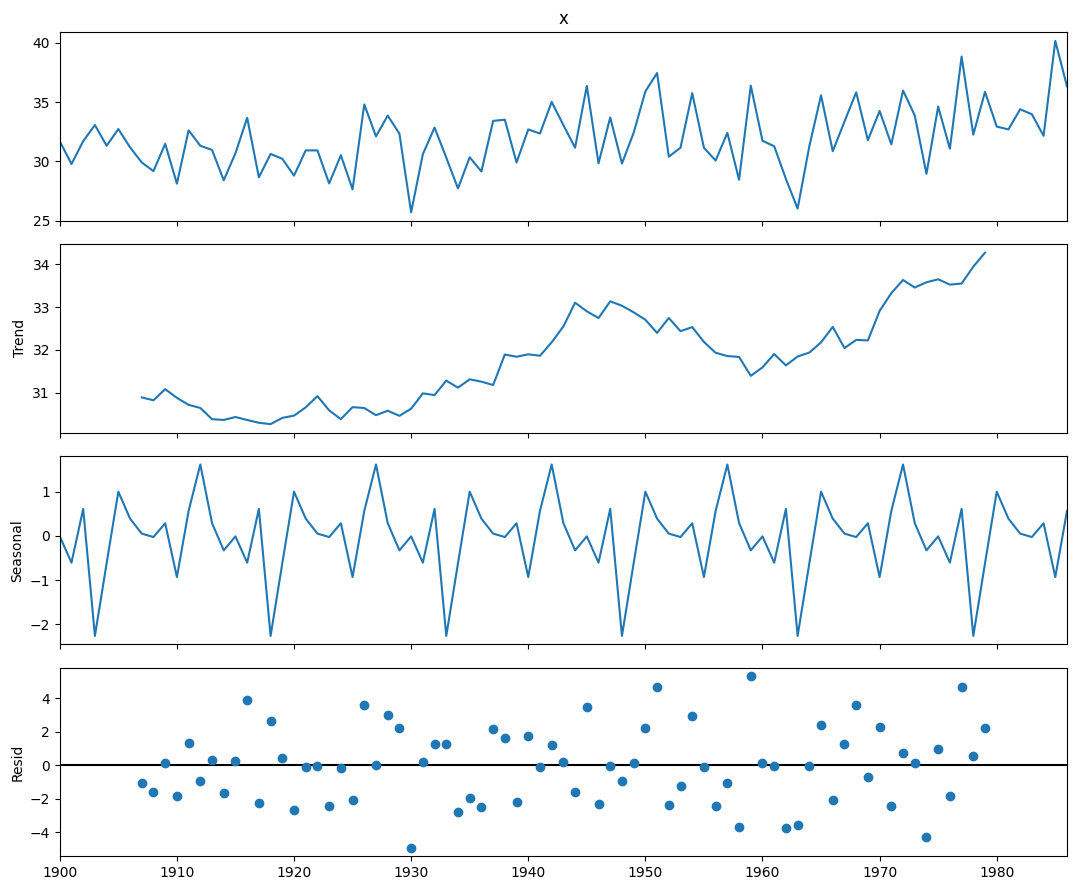

In [14]:
rcParams['figure.figsize'] = 11, 9


decompose = seasonal_decompose(df["x"], period=15)
decompose.plot()
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller

alpha = 0.05
name = "осадки"
ts = df["x"]

print(f'Тест Дики-Фуллера ряда {name} :')
dftest = adfuller(ts, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

if dfoutput["p-value"] < alpha:
    print(f"Значение p меньше {alpha * 100}%. Ряд стационарный.")
else:
    print(f"Значение p больше {alpha * 100}%. Ряд не стационарный.")

Тест Дики-Фуллера ряда осадки :
Test Statistic                 -1.714734
p-value                         0.423538
#Lags Used                      4.000000
Number of Observations Used    82.000000
Critical Value (1%)            -3.512738
Critical Value (5%)            -2.897490
Critical Value (10%)           -2.585949
dtype: float64
Значение p больше 5.0%. Ряд не стационарный.


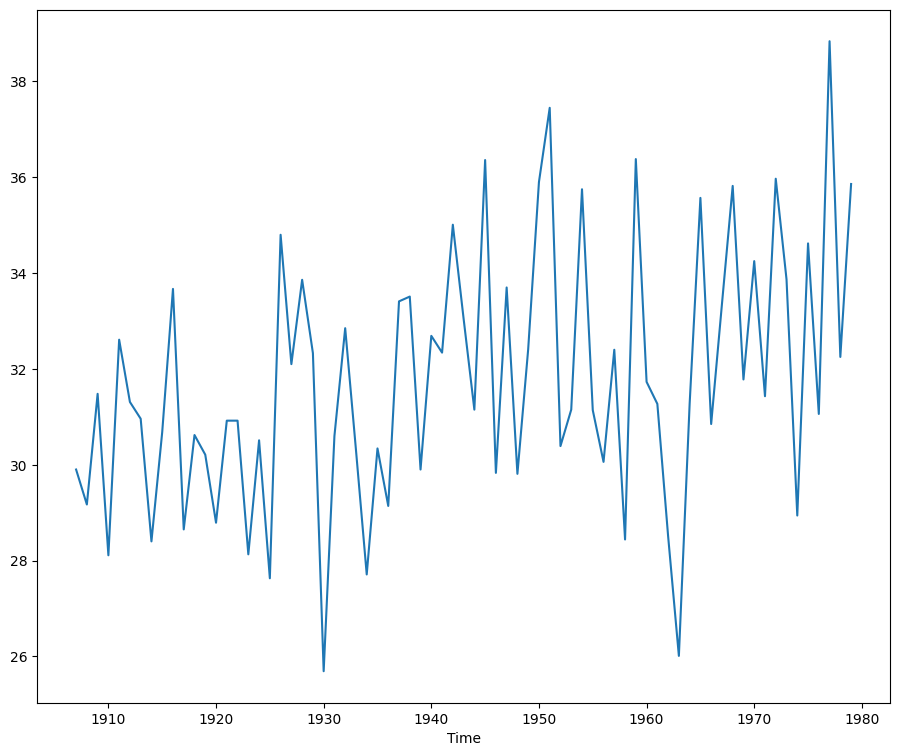

In [16]:
result = seasonal_decompose(df['x'], model='additive', period=15)
trend = result.trend
seasonal = result.seasonal
residual = result.resid
additive_series = trend + seasonal + residual
additive_series.plot()
plt.show()

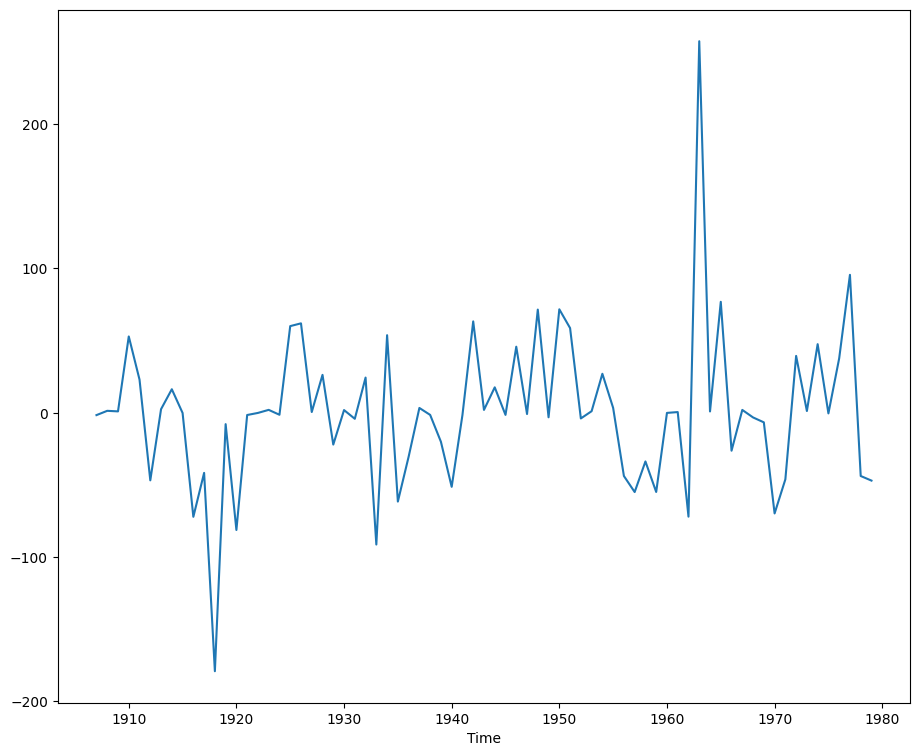

In [17]:
result = seasonal_decompose(df['x'], model='additive', period=15)
trend = result.trend
seasonal = result.seasonal
residual = result.resid
multiplicative_series = trend * seasonal * residual
multiplicative_series.plot()
plt.show()

<Figure size 1200x700 with 0 Axes>

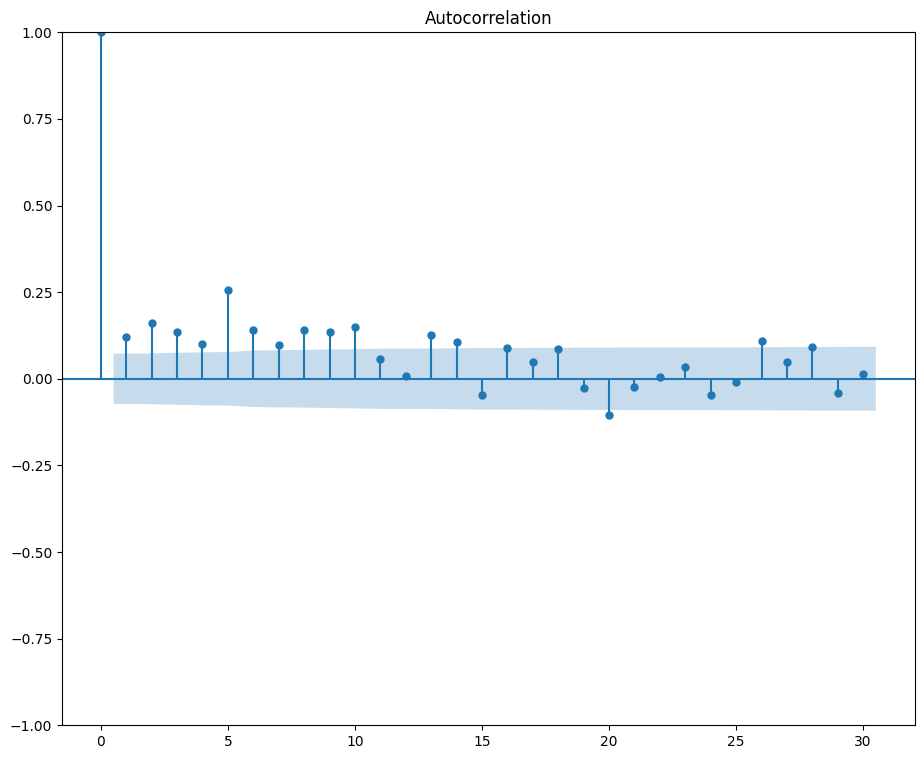

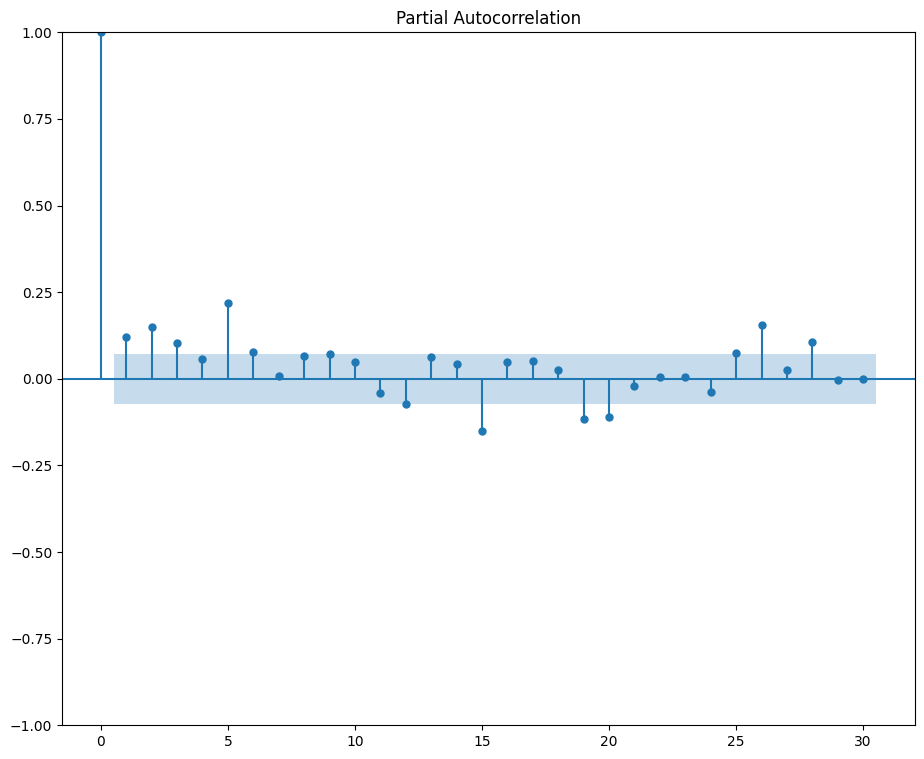

In [18]:
import statsmodels.tsa.api as smt
fig = plt.figure(figsize=(12, 7))
ac_plot = smt.graphics.plot_acf(ts, lags=30, alpha=0.5)
pac_plot = smt.graphics.plot_pacf(ts, lags=30, alpha=0.5)

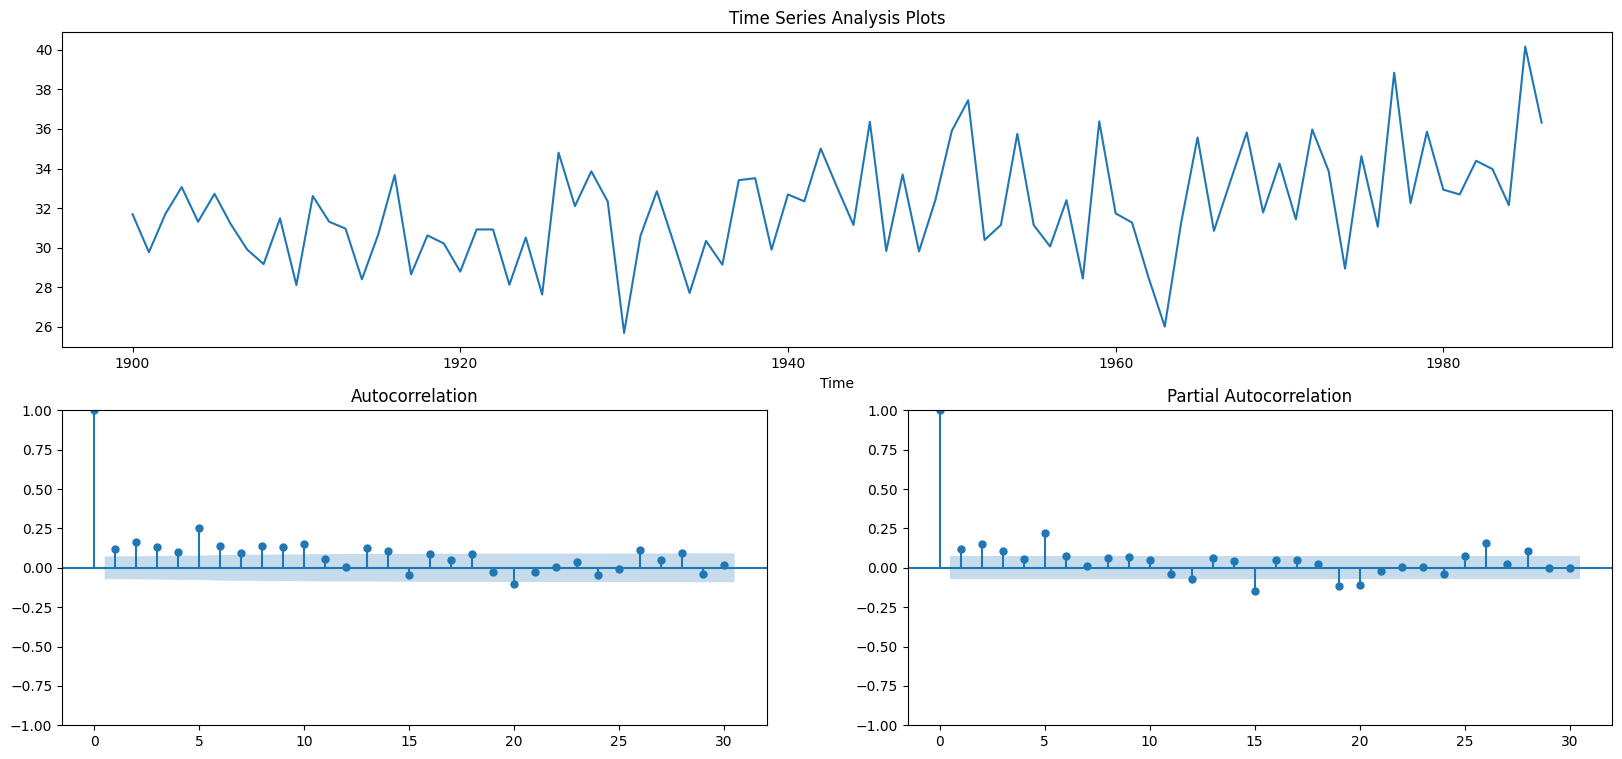

In [21]:
fig = plt.figure(figsize=(20, 9))
layout = (2, 2)
ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
acf_ax = plt.subplot2grid(layout, (1, 0))
pacf_ax = plt.subplot2grid(layout, (1, 1))

ts.plot(ax=ts_ax)
ts_ax.set_title('Time Series Analysis Plots')
smt.graphics.plot_acf(ts, lags=30, ax=acf_ax, alpha=0.5)
smt.graphics.plot_pacf(ts, lags=30, ax=pacf_ax, alpha=0.5)
None